# 2º Semana

Como na primeira semana eu separei e organizei os dados conforme notebook: [1º Semana](https://github.com/Dev-Zz/alura_challenge/blob/main/Alura%20Challenge/Alura%20Challenge%20Semana%201.ipynb), irei importar esses dados para próximos trabalhos.

## Leitura do arquivo da 1º Semana

In [274]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

dataset = pd.read_csv(r'C:\Users\Jose Eduardo\Documents\GitHub\alura_challenge\alura_challenge_1_semana.csv')

In [275]:
def plot_countplot(data, x, title, label_x: str, figsize: tuple = (8, 5), hue=None, small: bool = False):
    plt.figure(figsize=figsize)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                     "axes.spines.left": False, "axes.spines.bottom": True,}
    
    sns.set_theme(style="whitegrid", rc=custom_params)
    ax = sns.countplot(x=x, hue=hue, data=data, palette='viridis')
    
    ax.set(ylabel=None)
    ax.get_yaxis().set_visible(True)

    plt.title(title, fontsize=22, loc='left')
    plt.xlabel(label_x, fontsize=17)
    plt.xticks(fontsize=15)

    for container in ax.containers:
        if small:
            ax.bar_label(container, fontsize=15)
        else:
            ax.bar_label(container, fontsize=15, padding=-15, color='white')

    plt.show()

In [276]:
dataset.head(3)

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Serviço de Internet,...,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento,Total Gasto Mensal,Total Gasto Anual,Total Gasto Diário
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque,65.6,593.30,2.186667
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque,59.9,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,2.463333


## Analisar a variável target: Churn

Nos foi passado que devemos analisar a variável Churn, para isso usarei o **.describe()**

In [277]:
dataset.describe().round(2)

,Meses de Contrato,Total Gasto Mensal,Total Gasto Anual,Total Gasto Diário
count,7043.00,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.80,2.16
std,24.56,30.09,2266.73,1.00
min,0.00,18.25,18.80,0.61
25%,9.00,35.50,398.55,1.18
50%,29.00,70.35,1394.55,2.35
75%,55.00,89.85,3786.60,3.00
max,72.00,118.75,8684.80,3.96


In [278]:
dataset.describe(include=[object])

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Serviço Telefônico,Multiplas Linhas,Serviço de Internet,Proteção Internet,Backup Online,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Não,Masculino,Não,Não,Não,Sim,Não,Fibra ótica,Não,Não,Não,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [279]:
churn = pd.merge(
    left = dataset['Churn'].value_counts(sort = False),
    right = dataset['Churn'].value_counts(normalize=True, sort = False),
    left_index = True,
    right_index = True
)

churn.rename(columns={
    'Churn_x': 'Frequências',
    'Churn_y': 'Percentual'}, inplace = True)

churn.rename_axis('Churn', inplace = True)
churn

,Frequências,Percentual
Churn,,
Não,5174,0.73463
Sim,1869,0.26537


In [280]:
churn.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
Churn,,
Não,5174,73.46%
Sim,1869,26.54%


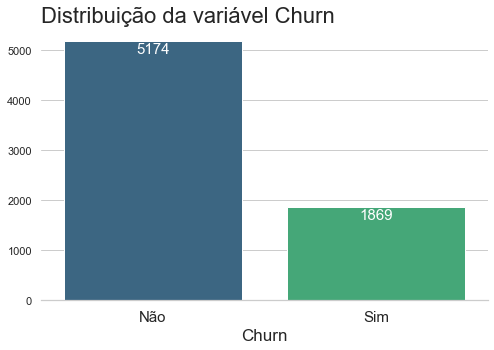

In [281]:
plot_countplot(data=dataset,
               x='Churn',
               title='Distribuição da variável Churn',
               label_x='Churn')

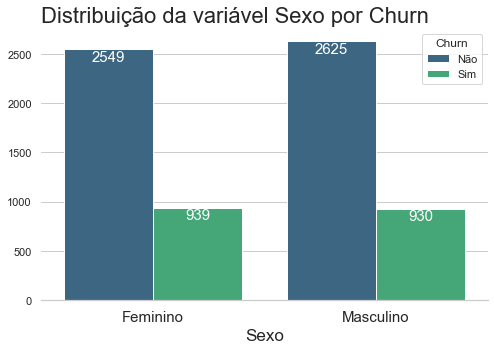

In [282]:
plot_countplot(data=dataset,
               x='Sexo',
               title='Distribuição da variável Sexo por Churn',
               label_x='Sexo',
               hue='Churn')

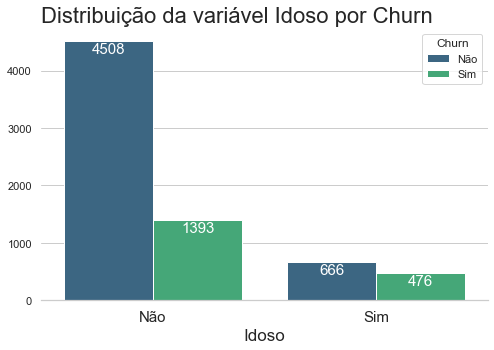

In [283]:
plot_countplot(data=dataset,
               x='Idoso',
               title='Distribuição da variável Idoso por Churn',
               label_x='Idoso',
               hue='Churn')

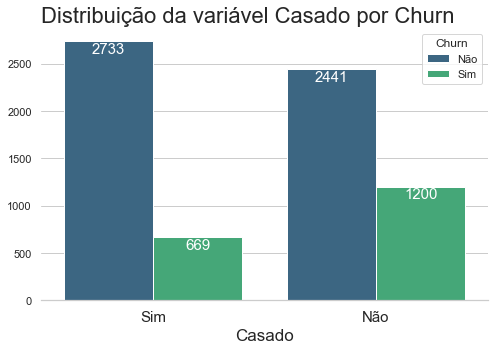

In [284]:
plot_countplot(data=dataset,
               x='Casado',
               title='Distribuição da variável Casado por Churn',
               label_x='Casado',
               hue='Churn')

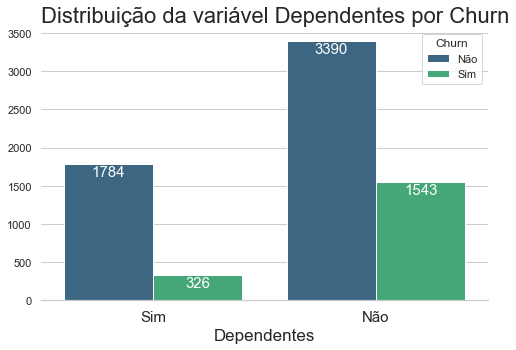

In [285]:
plot_countplot(data=dataset,
               x='Dependentes',
               title='Distribuição da variável Dependentes por Churn',
               label_x='Dependentes',
               hue='Churn')

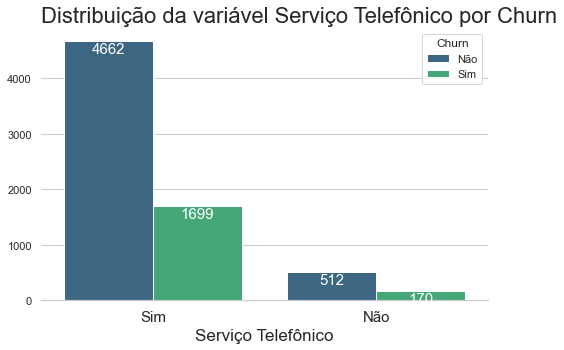

In [286]:
plot_countplot(data=dataset,
               x='Serviço Telefônico',
               title='Distribuição da variável Serviço Telefônico por Churn',
               label_x='Serviço Telefônico',
               hue='Churn')

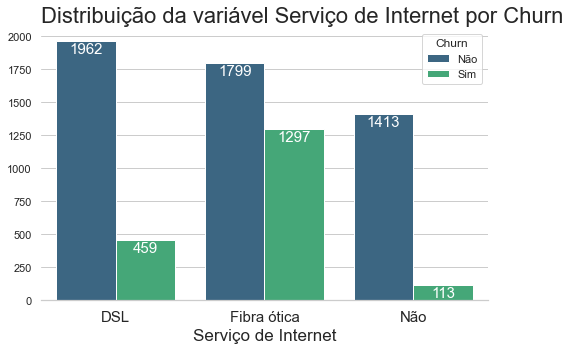

In [287]:
plot_countplot(data=dataset,
               x='Serviço de Internet',
               title='Distribuição da variável Serviço de Internet por Churn',
               label_x='Serviço de Internet',
               hue='Churn')

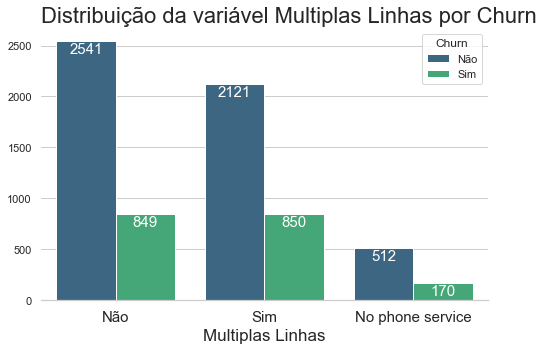

In [288]:
plot_countplot(data=dataset,
               x='Multiplas Linhas',
               title='Distribuição da variável Multiplas Linhas por Churn',
               label_x='Multiplas Linhas',
               hue='Churn')

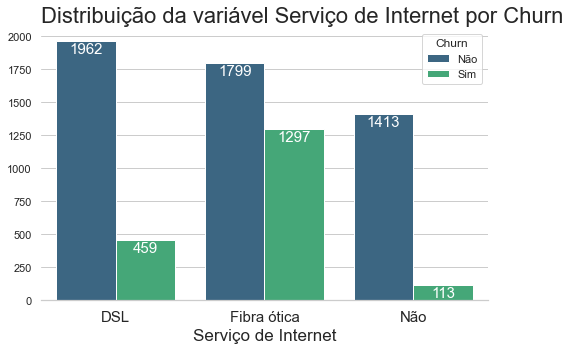

In [289]:
plot_countplot(data=dataset,
               x='Serviço de Internet',
               title='Distribuição da variável Serviço de Internet por Churn',
               label_x='Serviço de Internet',
               hue='Churn')

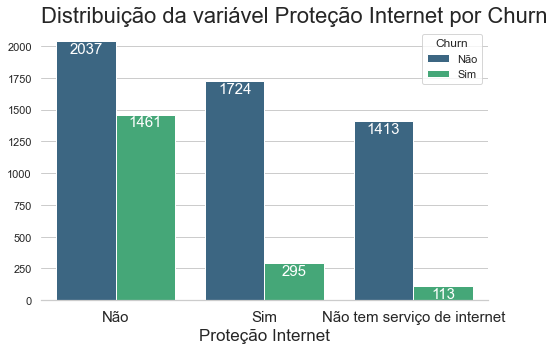

In [290]:
plot_countplot(data=dataset,
               x='Proteção Internet',
               title='Distribuição da variável Proteção Internet por Churn',
               label_x='Proteção Internet',
               hue='Churn')

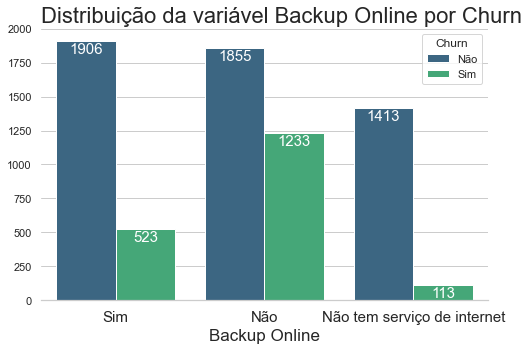

In [291]:
plot_countplot(data=dataset,
               x='Backup Online',
               title='Distribuição da variável Backup Online por Churn',
               label_x='Backup Online',
               hue='Churn')

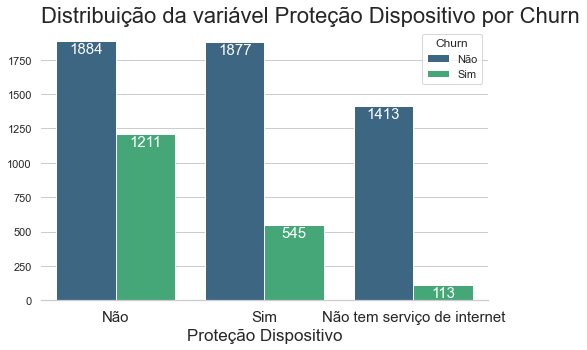

In [292]:
plot_countplot(data=dataset,
               x='Proteção Dispositivo',
               title='Distribuição da variável Proteção Dispositivo por Churn',
               label_x='Proteção Dispositivo',
               hue='Churn')

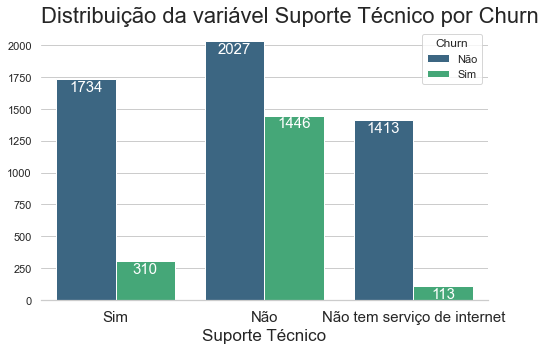

In [293]:
plot_countplot(data=dataset,
               x='Suporte Técnico',
               title='Distribuição da variável Suporte Técnico por Churn',
               label_x='Suporte Técnico',
               hue='Churn')

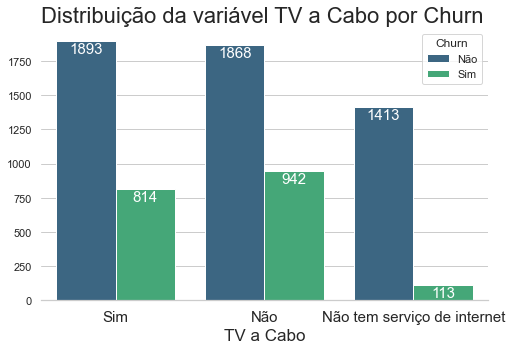

In [297]:
plot_countplot(data=dataset,
               x='TV a Cabo',
               title='Distribuição da variável TV a Cabo por Churn',
               label_x='TV a Cabo',
               hue='Churn')

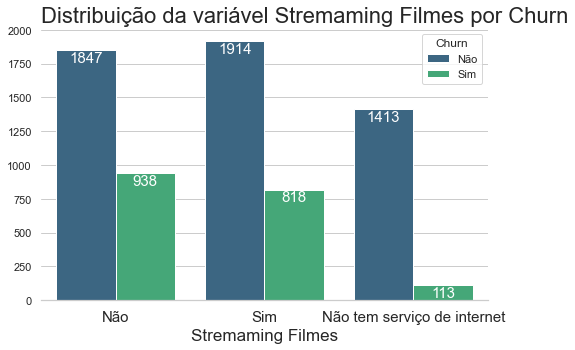

In [298]:
plot_countplot(data=dataset,
               x='Stremaming Filmes',
               title='Distribuição da variável Stremaming Filmes por Churn',
               label_x='Stremaming Filmes',
               hue='Churn')

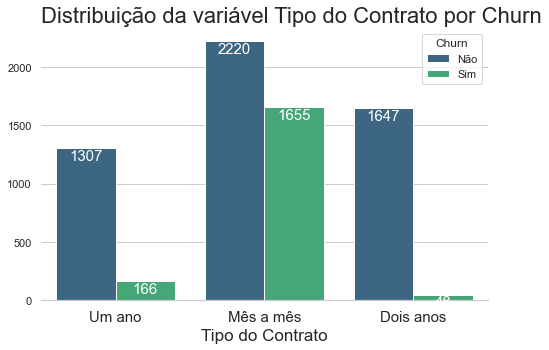

In [299]:
plot_countplot(data=dataset,
               x='Tipo do Contrato',
               title='Distribuição da variável Tipo do Contrato por Churn',
               label_x='Tipo do Contrato',
               hue='Churn')

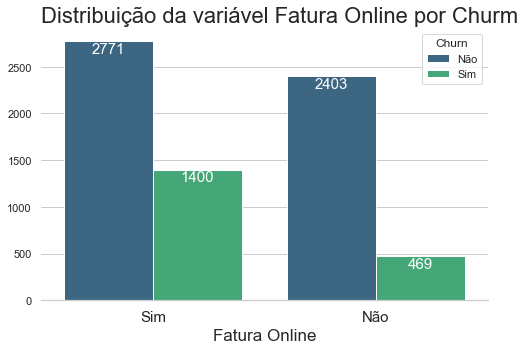

In [300]:
plot_countplot(data=dataset,
               x='Fatura Online',
               title='Distribuição da variável Fatura Online por Churm',
               label_x='Fatura Online',
               hue='Churn')

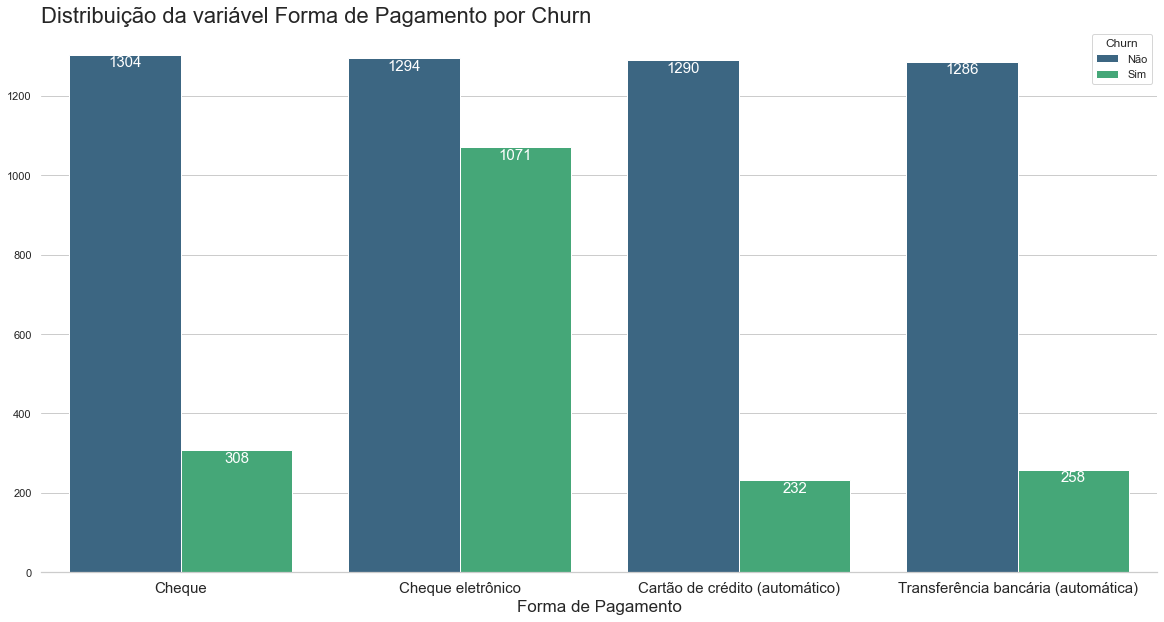

In [311]:
plot_countplot(data=dataset,
               figsize=(20,10),
               x='Forma de Pagamento',
               title='Distribuição da variável Forma de Pagamento por Churn',
               label_x='Forma de Pagamento',
               hue='Churn')

In [1]:
plot_countplot(data=dataset,
               x='Total Gasto Mensal',
               title='Distribuição da variável Total Gasto Mensal por Churn',
               label_x='Total Gasto Mensal',
               hue='Churn')

NameError: name 'plot_countplot' is not defined